### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [518]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [519]:
data = pd.read_csv('data/coupons.csv')

In [520]:
# data.head()
data[data.isnull()==False]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [521]:
data[data.isna()==True]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [522]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

2. Investigate the dataset for missing or problematic data.

In [523]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [524]:
data.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

3. Decide what to do about your missing data -- drop, replace, other...

In [525]:
print(data.isna().sum(axis=0))

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [526]:
print(data.isnull().sum(axis=0))


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [527]:
print(data["toCoupon_GEQ5min"].value_counts())
# print("NaN entries count : ",data["car"].isna().sum(axis=0))


toCoupon_GEQ5min
1    12684
Name: count, dtype: int64


In [528]:
#most of the value in this column is of no use - never is heavily skewed and other values are irrelevant, doesn't provide any information
# Dropping the column from the dataset
data = data.drop(columns=['car'])

In [529]:
print(data.isnull().sum(axis=0))


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [530]:

# convert all nan to never
data = data.fillna('never')

#Change values of age column so that it can be converted to numeric format (int)
data['age'].value_counts()
data['age']=data['age'].replace("50plus","51")
data['age']=data['age'].replace("below21","20")
data['age']=data['age'].astype(int)

data['expiration']=data['expiration'].replace("1d","24")
data['expiration']=data['expiration'].replace("2h","2")
data['expiration']=data['expiration'].astype(int)



Some attributes like Bar, CoffeeHouse, CarryAway etc. had NaN entries, which was converted to "never", as the other column had meaningful entries. The "car" attribute was dropped as the data is of not any use and most entries were NaN. 

4. What proportion of the total observations chose to accept the coupon? 



In [531]:
print(data[data['Y']==1]['Y'].count()," coupon were accepted.")
print(data['Y'].count(), " number of observations made.")
print((100*data[data['Y']==1]['Y'].count()/data['Y'].count()).__round__(2),"% of total observations chose to accept the coupon.")

#56.84% of user chose to use the coupon
#total ~ 12684
#Yes ~ 7210
#

7210  coupon were accepted.
12684  number of observations made.
56.84 % of total observations chose to accept the coupon.


7210  coupon were accepted.
12684  number of observations made.
56.84 % of total observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

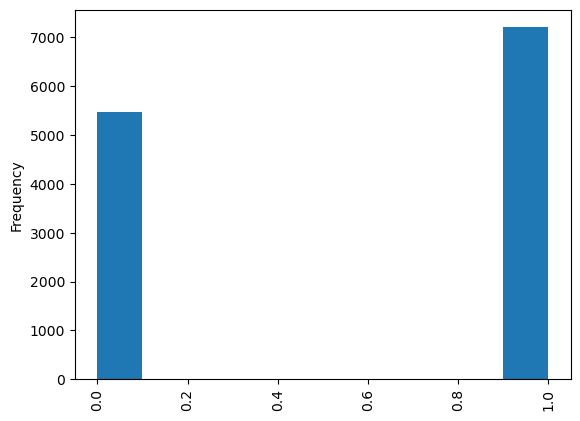

In [532]:
data['Y'].plot(kind="hist")
plt.xticks(rotation=90)
plt.savefig('images/count_y_hist.png')



6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



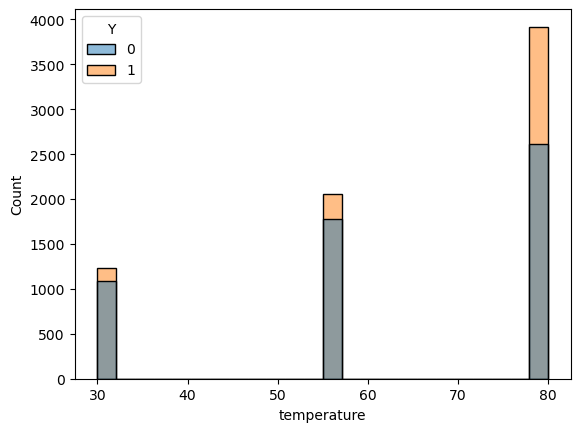

In [533]:
sns.histplot(data,x='temperature',hue='Y')
plt.savefig('images/count_temp_y_hist.png')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

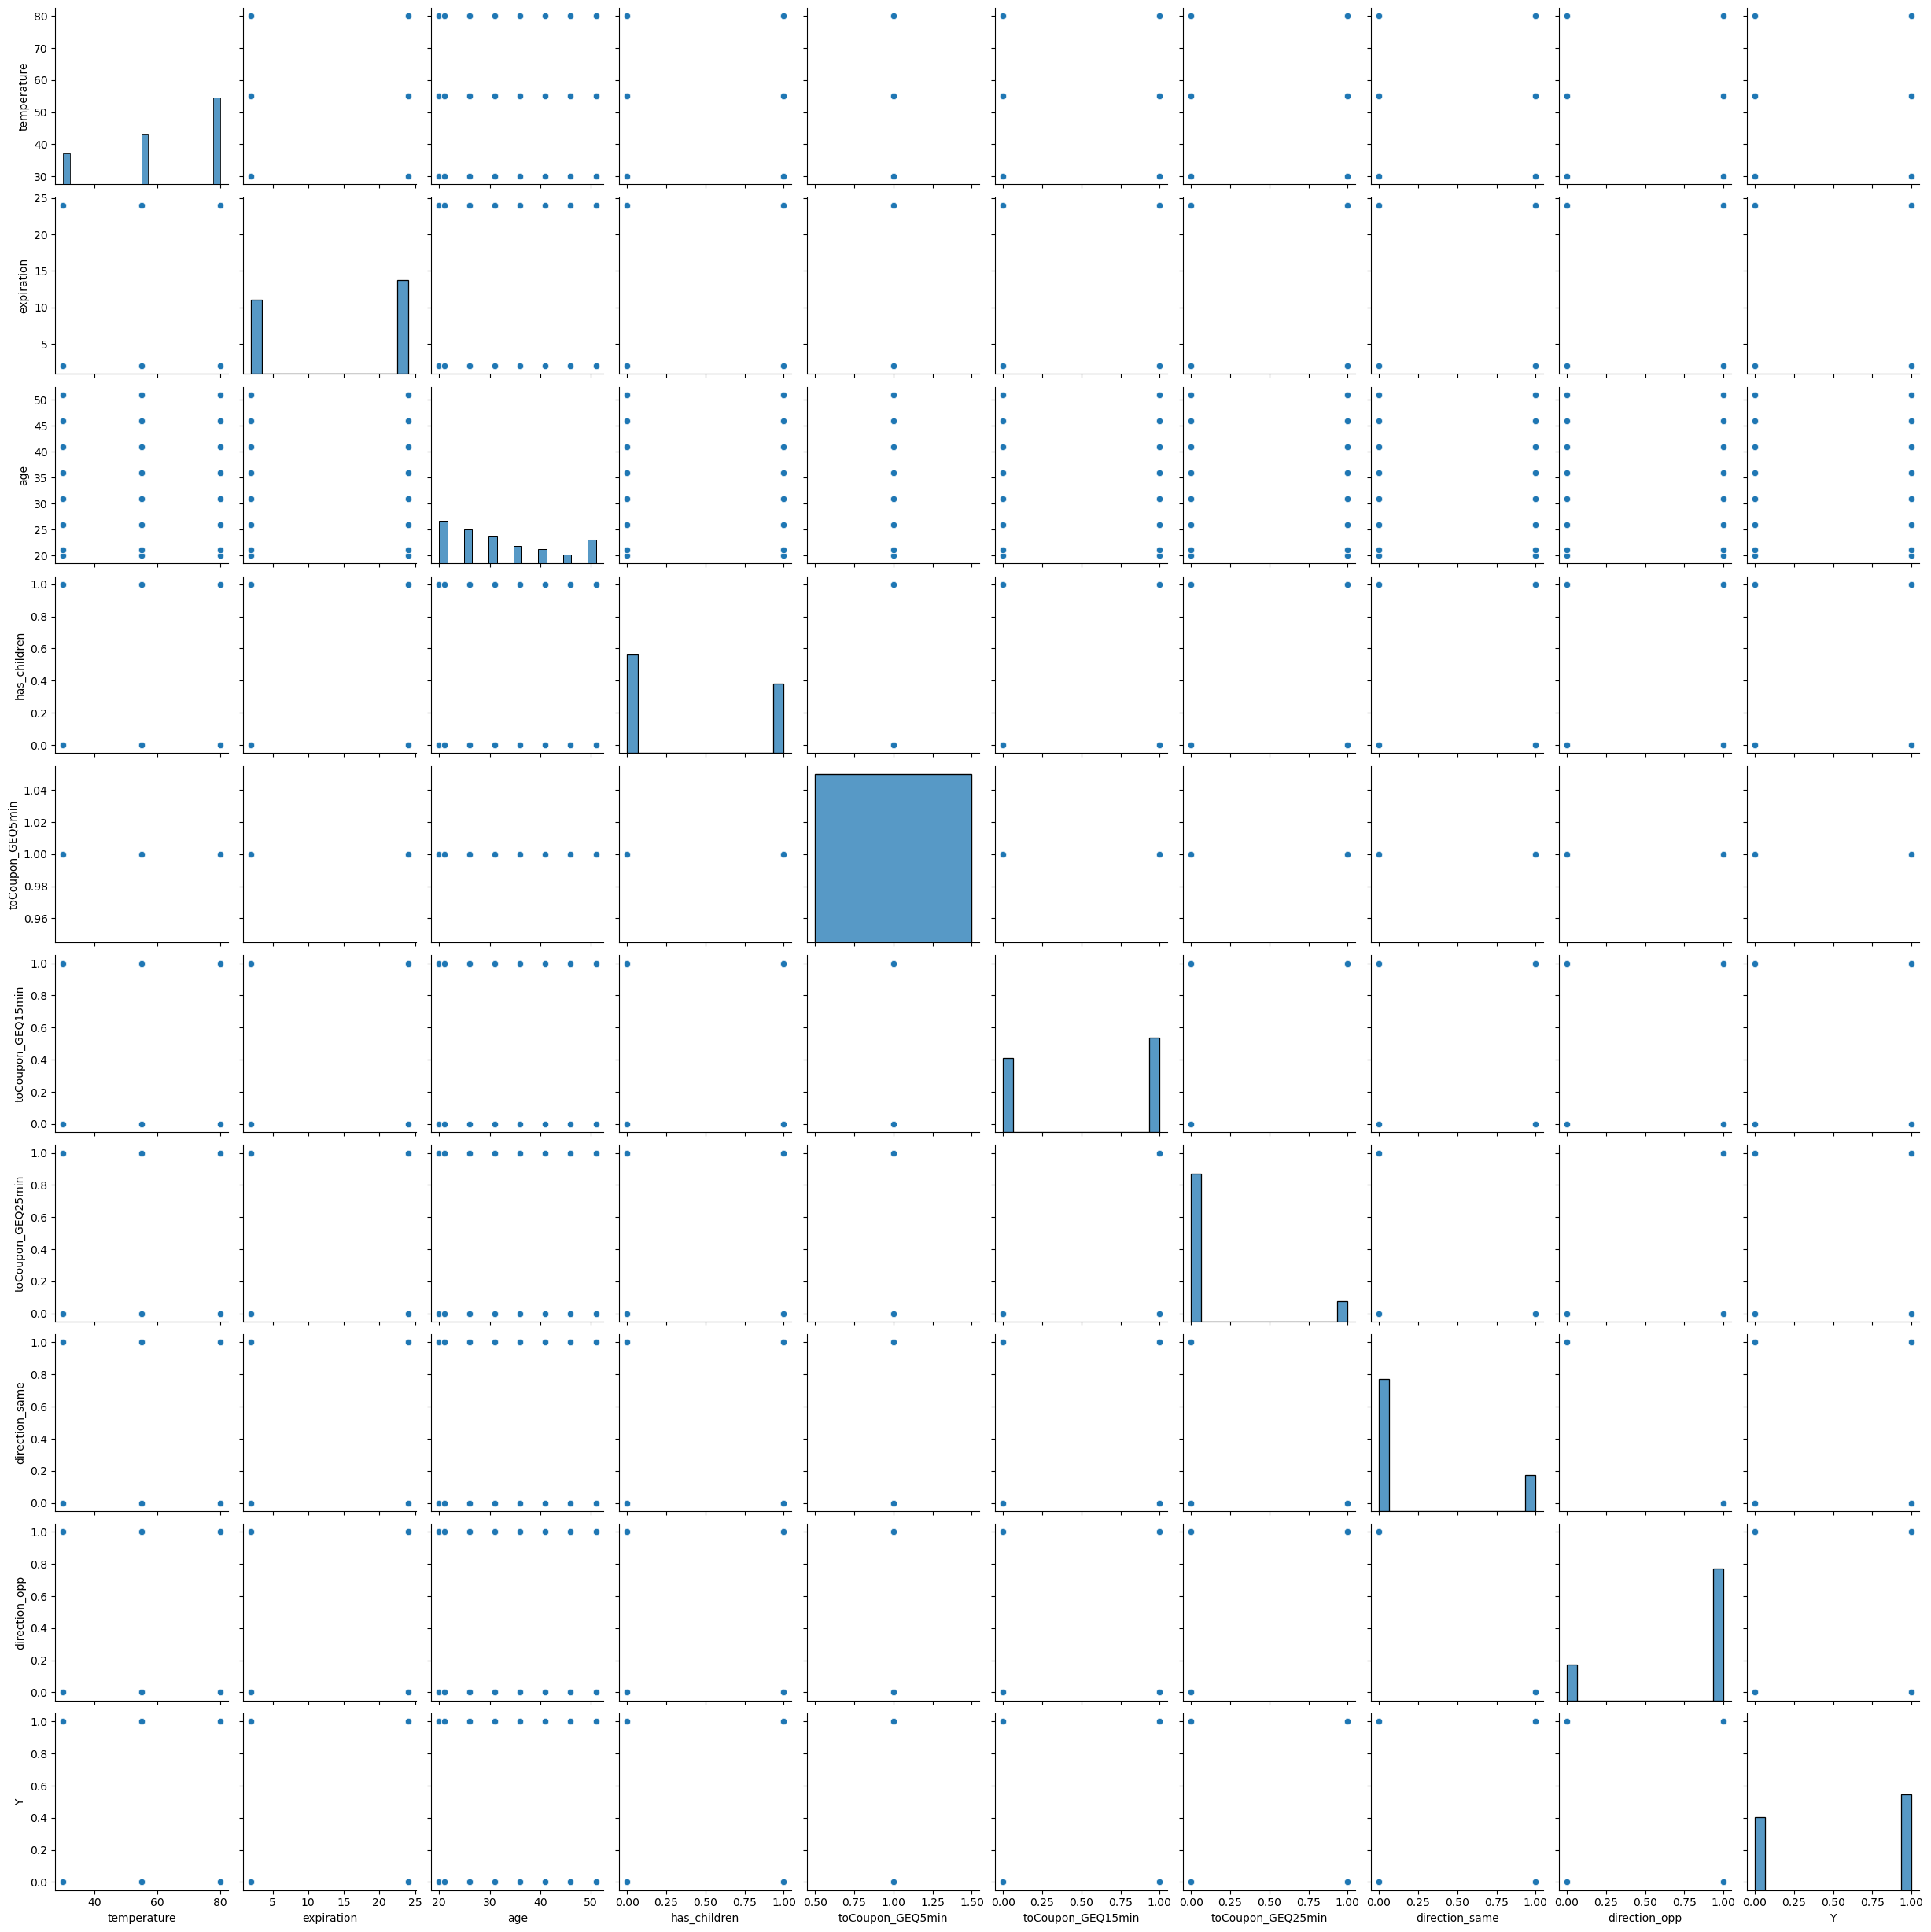

In [534]:
sns.pairplot(data)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [535]:
barCouponDF = data.query('coupon == "Bar"')
barCouponDF['Y'].value_counts()

Y
0    1190
1     827
Name: count, dtype: int64

In [536]:
#Check what are the values for Bar other than never
data[data['Bar']!='never']['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

/var/folders/zs/0m7pgcz15rv099ds6x84skrc0000gn/T/ipykernel_22094/151846623.py:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'expiration'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>,
        <Axes: title={'center': 'toCoupon_GEQ15min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>,
        <Axes: title={'center': 'direction_opp'}>],
       [<Axes: title={'center': 'Y'}>, <Axes: >, <Axes: >]], dtype=object)

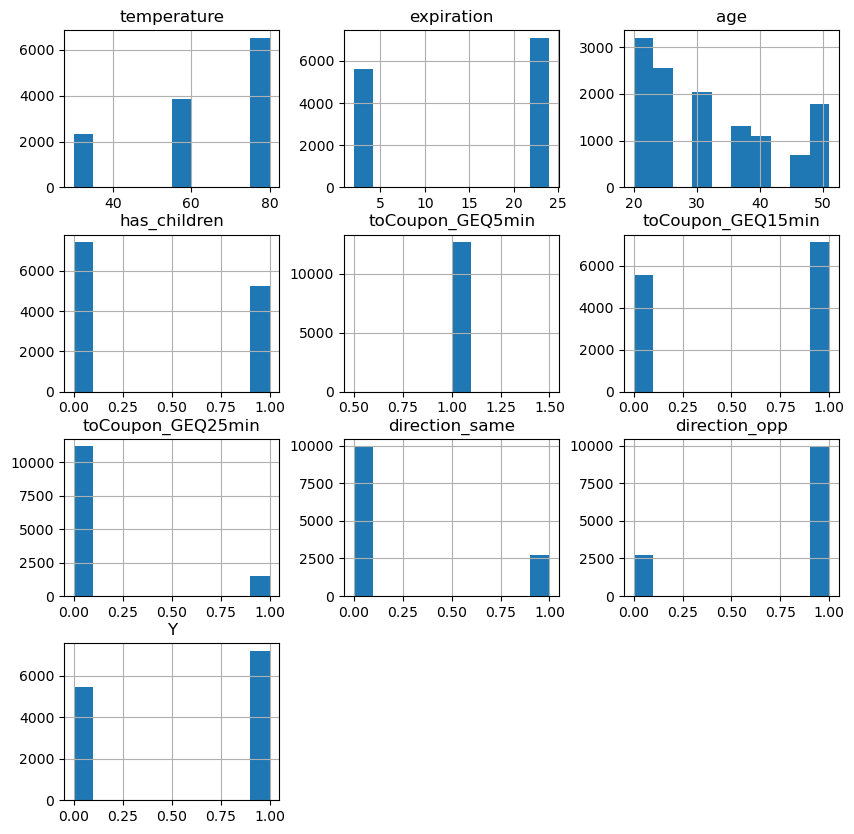

In [537]:
#Histogram sub-plot
data.hist(ax=(plt.figure(figsize=(10,10))).gca())


/var/folders/zs/0m7pgcz15rv099ds6x84skrc0000gn/T/ipykernel_22094/3815650752.py:1: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



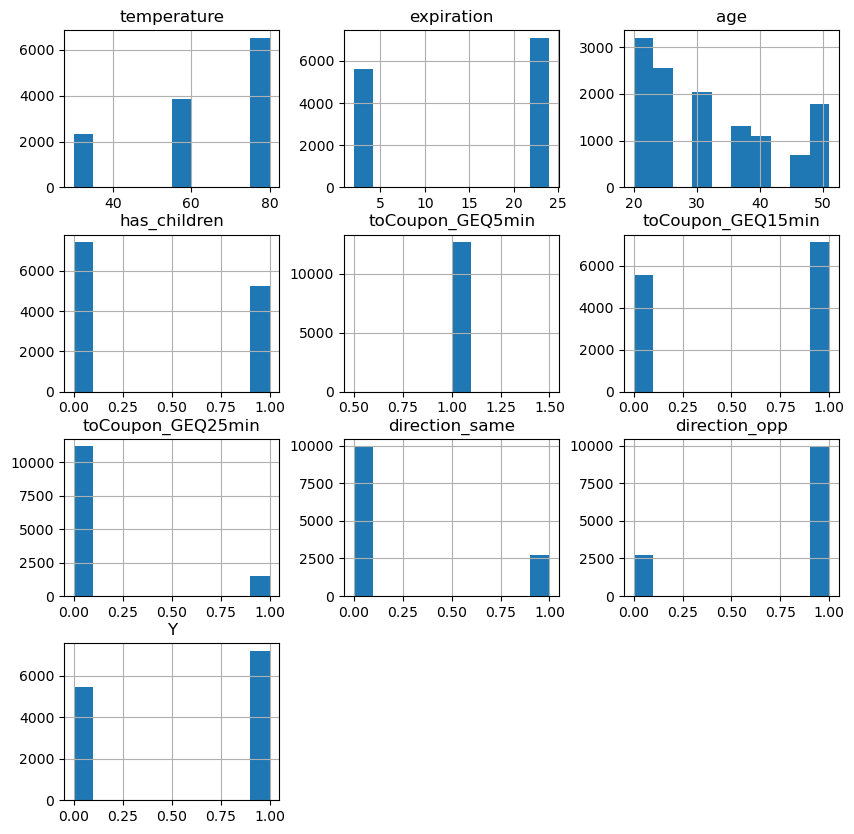

In [538]:
data.hist(ax=(plt.figure(figsize=(10,10))).gca())
sns.countplot(data=data, x=data['Y'], order=data['Y'].value_counts().sort_values(ascending=False).index)
plt.savefig('images/count_plot_alldata.png')


2. What proportion of bar coupons were accepted?


In [539]:
# barCouponDF['Y'].value_counts()
#0=1190 / 1=827
print((100*barCouponDF[['Y']].mean()).__round__(2),"% of Bar coupons were accepted.")


Y    41.0
dtype: float64 % of Bar coupons were accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


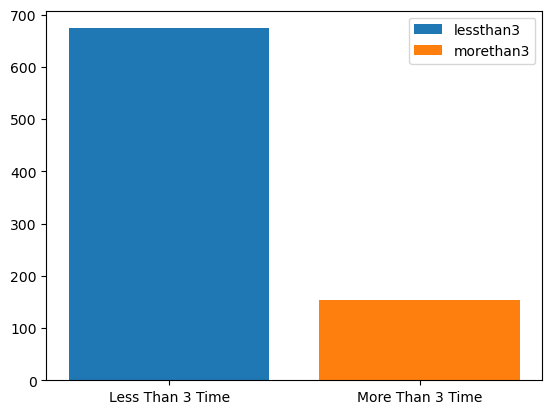

<Figure size 640x480 with 0 Axes>

In [550]:

barCouponDF['Bar'].unique()

X = ['Less Than 3 Time','More Than 3 Time']
X_axis = np.arange(len(X)) 
barlessthan3=['never', 'less1', '1~3']
barmorethan3=['gt8', '4~8']
lessthan3 = barCouponDF[barCouponDF["Bar"].isin(barlessthan3) & barCouponDF["Y"]==1]
morethan3 = barCouponDF[barCouponDF["Bar"].isin(barmorethan3) & barCouponDF["Y"]==1]
lessthan3.shape[0]/morethan3.shape[0]
# sns.histplot(lessthan3,x='Bar')
plt.bar(1,lessthan3.shape[0],label='lessthan3')
plt.bar(2,morethan3.shape[0],label='morethan3')
plt.xticks(X_axis+1, X) 

plt.legend() 
plt.show() 
plt.savefig('images/bar_lessthan3_morethan3.png')



In [549]:
print((lessthan3.shape[0]/morethan3.shape[0]).__round__(0),"x more coupon acceptance by people who go to bar less than 3 time in a month when comared to people who go more than 3 time per month.")


4.0 x more coupon acceptance by people who go to bar less than 3 time in a month when comared to people who go more than 3 time per month.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [421]:
# barlessthan3=['never', 'less1', '1~3']
barmorethan1=['1~3','gt8', '4~8']
morethan1_over25 = barCouponDF.query('Bar in @barmorethan1 and age>25')
morethan1_all = barCouponDF.query('Bar in @barmorethan1')

morethan1_over25_percent = 100*(morethan1_over25[morethan1_over25["Y"]==1].shape[0]/morethan1_all.shape[0]).__round__(2)
print(morethan1_over25_percent,"% of all the drivers who go to the bar more than once a month are of age over 25.")



49.0 % of all the drivers who go to the bar more than once a month are of age over 25.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [423]:
barmorethan1=['1~3','gt8', '4~8']
morethan1_nokid_farmfishing = barCouponDF.query('Bar in @barmorethan1 and passanger!="Kid(s)" and occupation!="Farming Fishing & Forestry"')
morethan1_nokid_farmfishing_percent = 100*(morethan1_nokid_farmfishing[morethan1_nokid_farmfishing["Y"]==1].shape[0]/morethan1_nokid_farmfishing.shape[0]).__round__(2)
print(morethan1_nokid_farmfishing_percent,"% of all the drivers who go to the bar more than once a month , had passengers that were not a kid and had occupation other than farming, fishing or forestry.")


71.0 % of all the drivers who go to the bar more than once a month , had passengers that were not a kid and had occupation other than farming, fishing or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [425]:
barmorethan1=['1~3','gt8', '4~8']
cheapresmorethan4=['gt8', '4~8']
incomeless50=['Less than $12500','$37500 - $49999','$12500 - $24999','$25000 - $37499 ']

morethan1_nokid_notwidow = barCouponDF.query('Bar in @barmorethan1 and passanger!="Kid(s)" and maritalStatus!="Widowed"')
morethan1_under30 = barCouponDF.query('Bar in @barmorethan1 and age <30')
cheap_restaurant_above4_income_under50 = barCouponDF.query('RestaurantLessThan20 in @cheapresmorethan4 and income in @incomeless50')
# morethan1[morethan1["Y"]==1].shape[0]/morethan1.shape[0]
print((100*morethan1_nokid_notwidow.query('Y == 1').shape[0]/morethan1_nokid_notwidow.shape[0]).__round__(2) , "% of people who go to bar more than once a month and accepted coupon, are didn't had kids or widows as passenger.")
print((100*morethan1_under30.query('Y == 1').shape[0]/morethan1_under30.shape[0]).__round__(2), "% of people who go to bar more than once a month and accepted coupon, are under 30 years old.")
print((100*cheap_restaurant_above4_income_under50.query('Y == 1').shape[0]/cheap_restaurant_above4_income_under50.shape[0]).__round__(2), "% of people who accepted coupon whent to cheaper resturant more than 4 times and income less than $50k.")



71.32 % of people who go to bar more than once a month and accepted coupon, are didn't had kids or widows as passenger.
72.17 % of people who go to bar more than once a month and accepted coupon, are under 30 years old.
45.56 % of people who accepted coupon whent to cheaper resturant more than 4 times and income less than $50k.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

People going to bar accept coupon more offten than others. The age or passenger they are carrying seems do not have any significat impact on decision to use coupon. 

In [426]:
# barCouponDF.isna().sum(axis=0)
barCouponDF["CarryAway"].unique()
barCouponDF["RestaurantLessThan20"].unique()
barCouponDF["Restaurant20To50"].unique()

# car                     2004
# CoffeeHouse               39
# CarryAway                 24
# RestaurantLessThan20      23
# Restaurant20To50          36

array(['1~3', 'less1', 'never', 'gt8', '4~8'], dtype=object)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



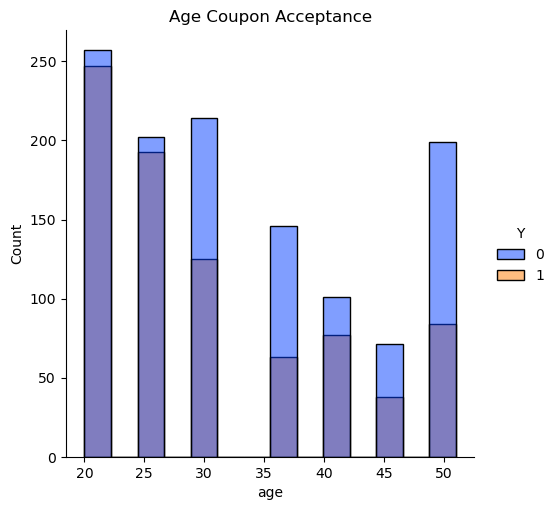

In [516]:
sns.displot(barCouponDF, x="age", hue="Y", palette='bright').set(title='Age Coupon Acceptance')
plt.savefig('images/bar_coupons_age_disp.png')

/var/folders/zs/0m7pgcz15rv099ds6x84skrc0000gn/T/ipykernel_22094/451949570.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



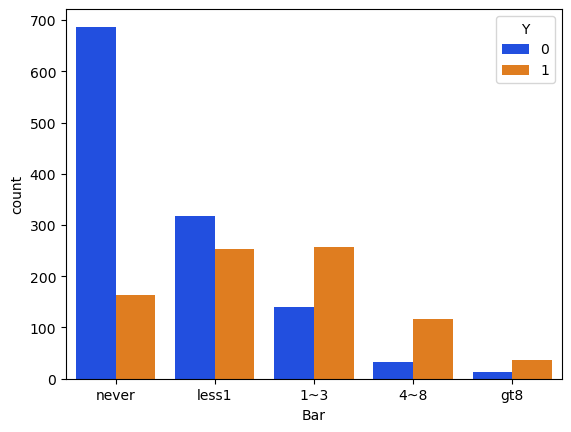

In [514]:

barCouponDF_Y_str = barCouponDF
barCouponDF_Y_str['Y'] = barCouponDF_Y_str['Y'].astype(str)
sns.countplot(barCouponDF_Y_str, x='Bar', hue='Y', palette='bright', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.savefig('images/barcount_acceptance_count.png')


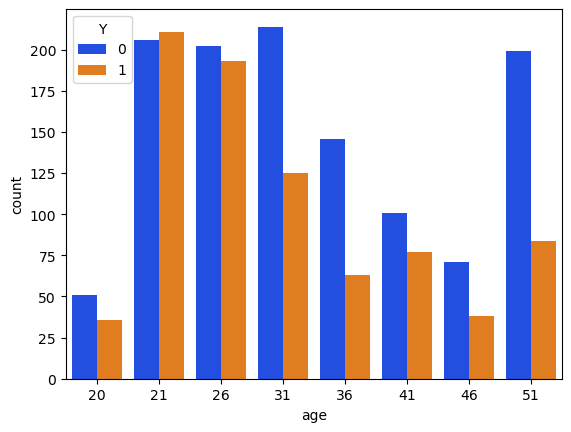

In [513]:
sns.countplot(barCouponDF_Y_str, x="age", hue="Y", palette='bright')
plt.savefig('images/age_acceptance_count_1.png')


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

For the independent investigation we would look at the coupon acceptance of "Coffee House". For this analysis we would create a new data frame for coffee house coupons. 

In [431]:
#Coffee House analysis.
coffeeCouponDF = data[data['coupon'] == 'Coffee House']



In [432]:
#Count of accepted and ignored coupons for cooffee house
coffeeCouponDF['Y'].value_counts()

Y
0    2001
1    1995
Name: count, dtype: int64

In [433]:
coffeepercent = coffeeCouponDF['Y'].mean()

In [434]:
print(100*coffeepercent.__round__(2),"% of coffee house coupons were accepted.")

50.0 % of coffee house coupons were accepted.


In [435]:
#Various number of time people visit coffee house 
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    3179
4~8      1784
gt8      1111
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



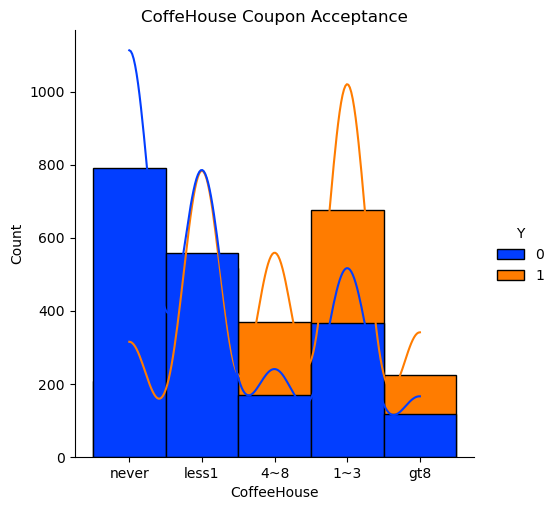

In [512]:
sns.displot(coffeeCouponDF, x='CoffeeHouse', hue='Y', kde=True, palette='bright', alpha = 1).set(title='CoffeHouse Coupon Acceptance')
plt.savefig('images/coffeehouse_acceptance_count_disp.png')


We can see in the above histogram, more the people visit coffee house more possible for them to use the coupon. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



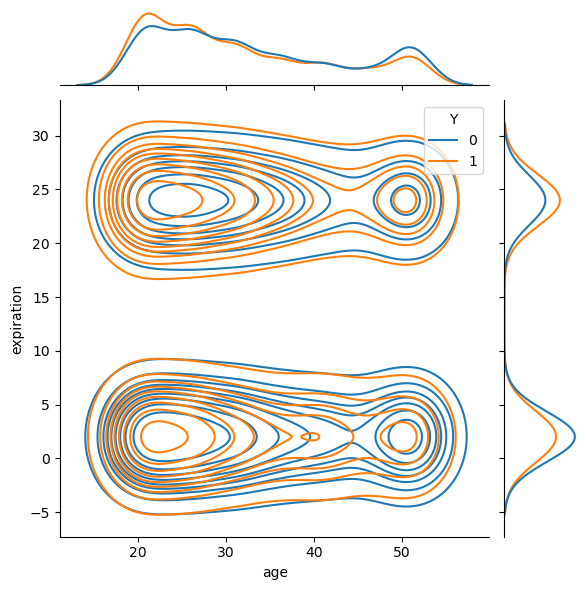

In [551]:
#Longer expiration coupons are used more than the shorter duration coupon
sns.jointplot(coffeeCouponDF,x='age',y='expiration',hue='Y',kind="kde")
plt.savefig('images/age_expiration_acceptance_join.png')


In [438]:
# data['expiration'] = 


chmorethan1=['1~3','gt8', '4~8']
incomeless50=['Less than $12500','$37500 - $49999','$12500 - $24999','$25000 - $37499 ']

morethan1ch_nokid_notmarried = coffeeCouponDF.query('CoffeeHouse in @chmorethan1 and passanger!="Kid(s)" and maritalStatus!="Married partner"')
morethan1ch_under30 = coffeeCouponDF.query('CoffeeHouse in @chmorethan1 and age <30 and income in @incomeless50')

print((100*morethan1ch_nokid_notmarried.query('Y == 1').shape[0]/morethan1ch_nokid_notmarried.shape[0]).__round__(2) , "% of people who go to coffee house more than once a month and accepted coupon, didn't had kids and are not married.")
print((100*morethan1ch_under30.query('Y == 1').shape[0]/morethan1ch_under30.shape[0]).__round__(2), "% of people who go to coffee house more than once a month and accepted coupon, are under 30 years old earning less than 50k annually.")



66.0 % of people who go to coffee house more than once a month and accepted coupon, didn't had kids and are not married.
68.63 % of people who go to coffee house more than once a month and accepted coupon, are under 30 years old earning less than 50k annually.


In [510]:
#Younger people in all the income groups tend to use coupon more than any other category.
px.scatter(morethan1ch_nokid_notmarried,x='age',y='income',size='age',marginal_x='histogram',marginal_y='histogram',color="Y")
# plt.savefig('images/morethan1ch_nokid_notmarried_scatter.png')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



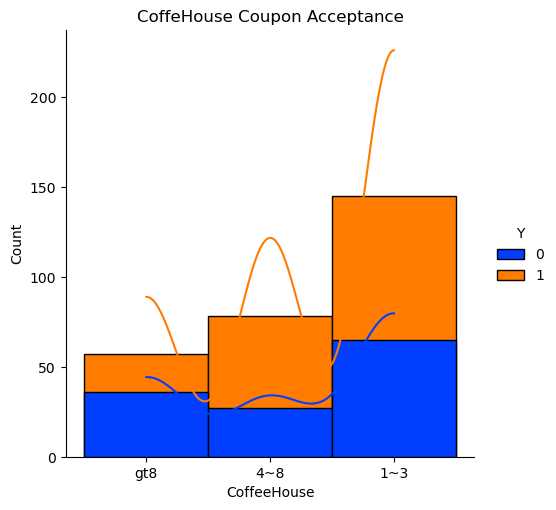

In [504]:
#Drivers visiting the coffee house more than once a month tend to accept the coupon more than others.
sns.displot(morethan1ch_under30, x='CoffeeHouse', hue='Y', kde=True, palette='bright', alpha = 1).set(title='CoffeHouse Coupon Acceptance')
plt.savefig('images/coffeehouse_acceptance_dispplt.png')


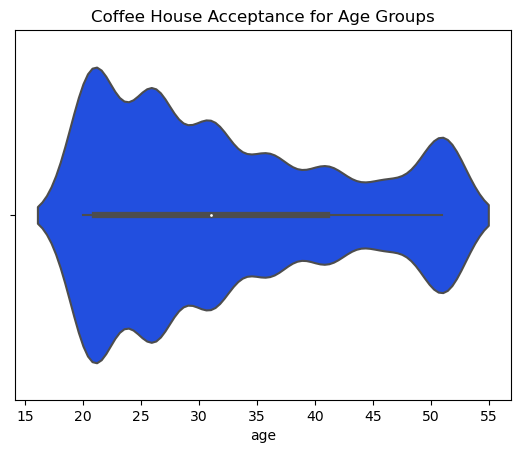

In [503]:
sns.violinplot(data=coffeeCouponDF, x="age", hue="Y", palette='bright').set_title('Coffee House Acceptance for Age Groups')
plt.savefig('images/coffeehouse_age_coupon_acceptance_viol.png')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



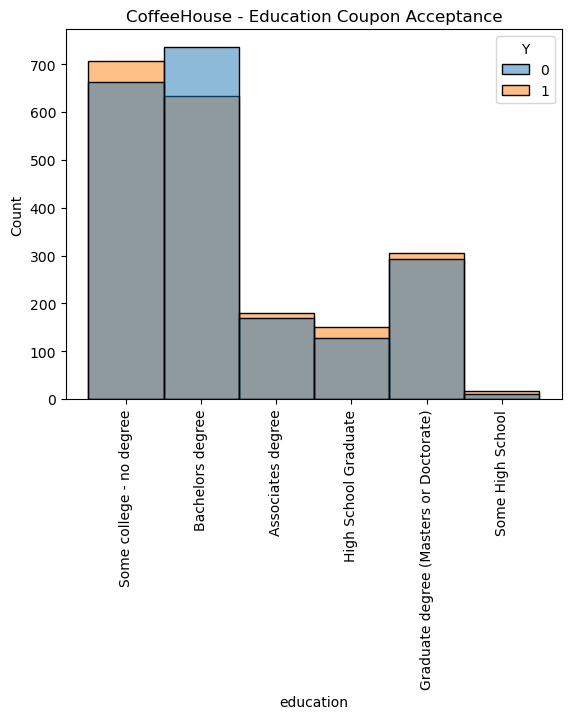

In [501]:
#All different education level had similar ratio of Coffee house coupons acceptance  
sns.histplot(coffeeCouponDF,x='education',hue='Y').set(title='CoffeeHouse - Education Coupon Acceptance')
plt.xticks(rotation=90)
plt.savefig('images/coffeehouse_education_coupon_acceptance_hist.png')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Some college - no degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

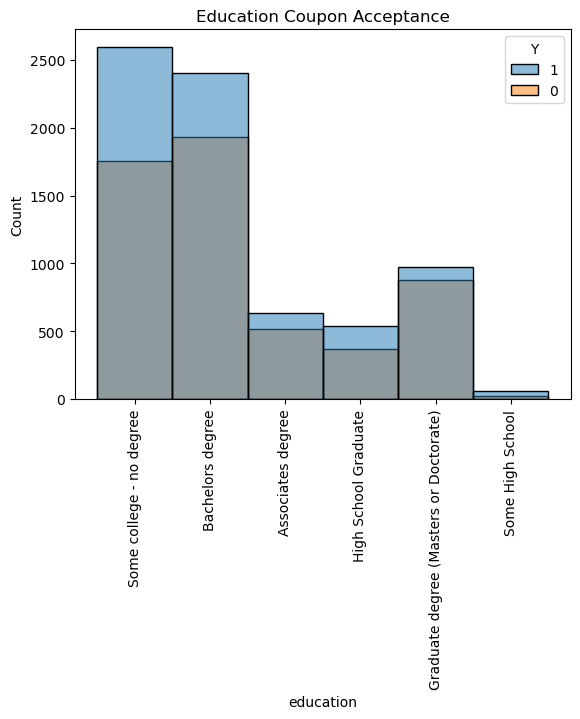

In [495]:
#People with no college degree accepted more coupon than rejecting it, other categories had very close acceptance rate but delta of acceptance to rejection was less.

sns.histplot(data,x='education',hue='Y',).set(title='Education Coupon Acceptance')
plt.xticks(rotation=90)
plt.savefig('images/education_coupon_acceptance_hist.png')

#

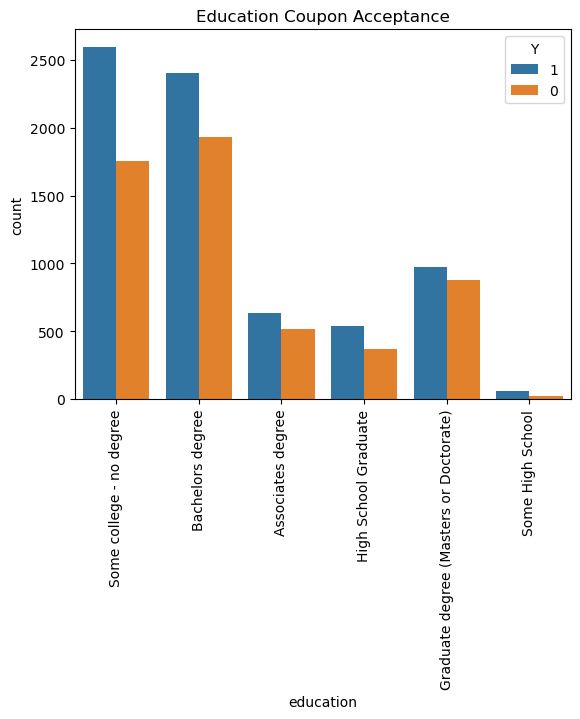

In [497]:
sns.countplot(data,x='education',hue='Y').set(title='Education Coupon Acceptance')
plt.xticks(rotation=90)
plt.savefig('images/education_coupon_acceptance.png')


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Unmarried partner'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Married partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

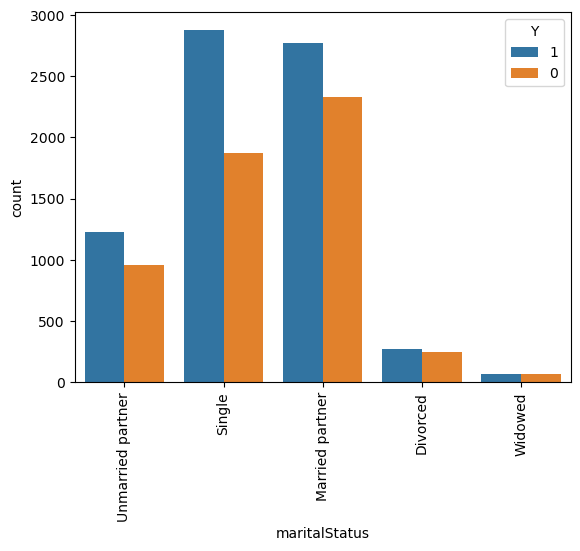

In [444]:
data_ystr = data
data_ystr['Y'] = data_ystr['Y'].astype(str)
sns.countplot(data_ystr,x='maritalStatus',hue='Y')
plt.xticks(rotation=90)
plt.savefig('images/marital_status_coupon_acceptance.png')



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

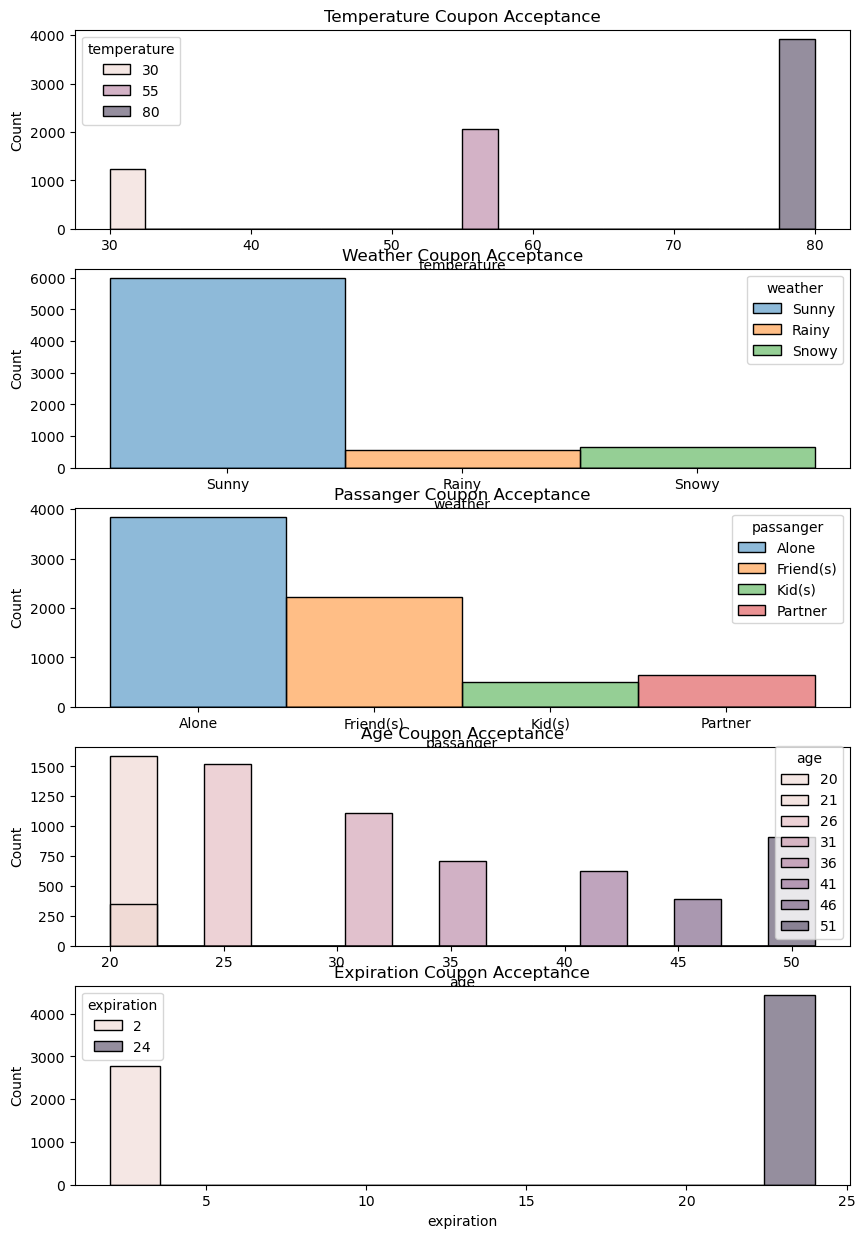

In [487]:
fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(10,15))
sns.histplot(data.query('Y == "1"'),x='temperature',hue='temperature',ax=axes[0]).set(title='Temperature Coupon Acceptance')
sns.histplot(data.query('Y == "1"'),x='weather',hue='weather',ax=axes[1]).set(title='Weather Coupon Acceptance')
sns.histplot(data.query('Y == "1"'),x='passanger',hue='passanger',ax=axes[2]).set(title='Passanger Coupon Acceptance')
sns.histplot(data.query('Y == "1"'),x='age',hue='age',ax=axes[3]).set(title='Age Coupon Acceptance')
sns.histplot(data.query('Y == "1"'),x='expiration',hue='expiration',ax=axes[4]).set(title='Expiration Coupon Acceptance')
plt.savefig('images/subplots_weather_temp_age_expiration.png')



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



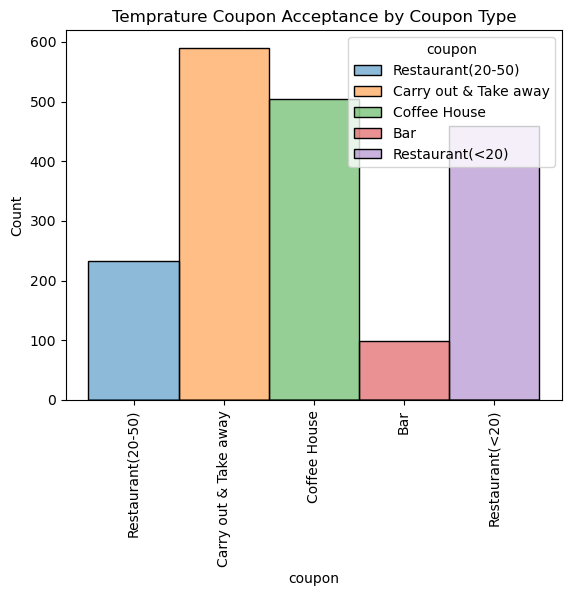

In [499]:
#Carry out & take away had most coupon acceptance when the temprature is 80 degree , weather is sunny and there was no passanger.
sns.histplot(data.query('Y == "1" and temperature == 80 and passanger == "Alone" and weather == "Sunny" '),x='coupon',hue='coupon').set(title='Temprature Coupon Acceptance by Coupon Type')
plt.xticks(rotation=90)
plt.savefig('images/weather_temp_passanger_expiration_couponType.png')



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

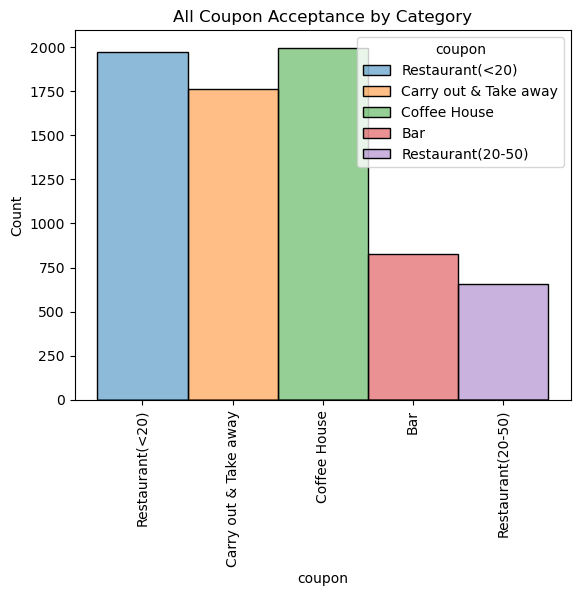

In [248]:
#Coupons for cheaper resturants and coffee house were accepted more, carry out & take was not far 
sns.histplot(data.query('Y == 1'),x='coupon',hue='coupon').set(title='All Coupon Acceptance by Category')
plt.xticks(rotation=90)

In [471]:
for coupon_code in data['coupon'].unique():
    print(coupon_code)

Restaurant(<20)
Coffee House
Carry out & Take away
Bar
Restaurant(20-50)


In [485]:
for coupon_code in data['coupon'].unique():
    print(coupon_code," - ",(100*data.query('Y == "1" and coupon == @coupon_code ').shape[0]/data.query('Y == "1"').shape[0]).__round__(2),"%")



Restaurant(<20)  -  27.32 %
Coffee House  -  27.67 %
Carry out & Take away  -  24.41 %
Bar  -  11.47 %
Restaurant(20-50)  -  9.13 %


In [294]:
acceptance_ratio = (100*data['Y'].mean()).__round__(2)
bar_acceptance_ratio = (100*data.query('coupon == "Bar" and Y == 1').shape[0]/data[data['Y']==1].shape[0]).__round__(2)
ch_acceptance_ratio = (100*data.query('coupon == "Coffee House" and Y == 1').shape[0]/data[data['Y']==1].shape[0]).__round__(2)


print(acceptance_ratio,"% of total coupan were accepted.")
print(bar_acceptance_ratio,"% of coupan accepted were for bar.")
print(ch_acceptance_ratio,"% of coupan accepted were for coffee house.")

56.84 % of total coupan were accepted.
11.47 % of coupan accepted were for bar.
27.67 % of coupan accepted were for coffee house.


Analysis of Coffee House coupons - 


1. 50.0 % of coffee house coupons were accepted.
       
2. We found that more coupons were used by drivers visting coffee house more.

3. Coffee house coupons with longer expiration time(1d) are used more than the shorter duration coupon(2h)

4. 66.0 % of people who go to coffee house more than once a month and accepted coupon, didn't had kids and are not married.

5. 68.63 % of people who go to coffee house more than once a month and accepted coupon, are under 30 years old earning less than 50k annually.                 

6. Younger people in all the income groups tend to use coffee house coupon.

7. Drivers visiting the coffee house more than once a month tend to accept the coupon more than others.

8. All different education level had similar ratio of Coffee house coupons acceptance  



General analysis - 
1. People with no college degree accepted more coupon than rejecting it, other categories had very close acceptance rate but delta of acceptance to rejection was less.

2. Carry out & take away had most coupon acceptance when the temprature is 80 degree , weather is sunny and there was no passanger.

3. Coupons for cheaper resturants and coffee house were accepted more, carry out & take was not far.